In [1]:
!pip install -q keras
!pip install tensorflow 
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
from tensorflow import keras

Requirement already up-to-date: tensorflow in c:\users\ayoub\anaconda3\lib\site-packages (2.7.0)
Requirement already up-to-date: tensorflow-gpu in c:\users\ayoub\anaconda3\lib\site-packages (2.7.0)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [3]:
# PARAMS
nb_classes = 10

In [4]:
# DATASET
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


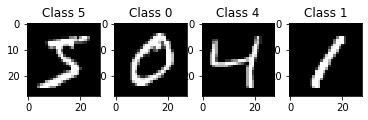

In [5]:
# Description
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [6]:
# 1 vecteur
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# int => float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# valeurs entre 0 et 1
X_train /= 255
X_test /= 255

# 1 colonne pour chaque classe
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
# Model sans couche caché
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                           
model.add(Dense(10))
model.add(Activation('softmax')) # pas de multi classe

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.fit(X_train, Y_train, batch_size=128, epochs=6, verbose=1, validation_data=(X_test, Y_test))

score, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/6
469/469 [==============================] - 5s 7ms/step - loss: 0.2690 - accuracy: 0.9244 - val_loss: 0.1322 - val_accuracy: 0.9618
Epoch 2/6
469/469 [==============================] - 3s 7ms/step - loss: 0.1087 - accuracy: 0.9687 - val_loss: 0.0999 - val_accuracy: 0.9697
Epoch 3/6
469/469 [==============================] - 4s 9ms/step - loss: 0.0697 - accuracy: 0.9795 - val_loss: 0.0727 - val_accuracy: 0.9756
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0656 - val_accuracy: 0.9793
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0352 - accuracy: 0.9898 - val_loss: 0.0657 - val_accuracy: 0.9785
Epoch 6/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0666 - val_accuracy: 0.9792
Test score: 0.06656647473573685
Test accuracy: 0.979200005531311


In [8]:
# Model sans couche caché + Dropout couche entree
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # pas de multi classe

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.fit(X_train, Y_train, batch_size=128, epochs=6, verbose=1, validation_data=(X_test, Y_test))

score, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/6
469/469 [==============================] - 4s 7ms/step - loss: 0.2885 - accuracy: 0.9177 - val_loss: 0.1409 - val_accuracy: 0.9577
Epoch 2/6
469/469 [==============================] - 3s 7ms/step - loss: 0.1246 - accuracy: 0.9631 - val_loss: 0.1020 - val_accuracy: 0.9683
Epoch 3/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0861 - accuracy: 0.9739 - val_loss: 0.0801 - val_accuracy: 0.9748
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0652 - accuracy: 0.9798 - val_loss: 0.0717 - val_accuracy: 0.9772
Epoch 5/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0679 - val_accuracy: 0.9793
Epoch 6/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0693 - val_accuracy: 0.9797
Test score: 0.06934041529893875
Test accuracy: 0.9797000288963318


In [9]:
# Definition du Model fourni
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                           
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # pas de multi classe

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.fit(X_train, Y_train, batch_size=128, epochs=6, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/6
469/469 [==============================] - 6s 13ms/step - loss: 0.2496 - accuracy: 0.9246 - val_loss: 0.1041 - val_accuracy: 0.9678
Epoch 2/6
469/469 [==============================] - 7s 14ms/step - loss: 0.1008 - accuracy: 0.9690 - val_loss: 0.0892 - val_accuracy: 0.9717
Epoch 3/6
469/469 [==============================] - 6s 13ms/step - loss: 0.0718 - accuracy: 0.9772 - val_loss: 0.0732 - val_accuracy: 0.9783
Epoch 4/6
469/469 [==============================] - 6s 13ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.0667 - val_accuracy: 0.9792
Epoch 5/6
469/469 [==============================] - 6s 13ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.0697 - val_accuracy: 0.9782
Epoch 6/6
469/469 [==============================] - 7s 15ms/step - loss: 0.0402 - accuracy: 0.9862 - val_loss: 0.0716 - val_accuracy: 0.9798


In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07155046612024307
Test accuracy: 0.9797999858856201


In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred {}, Res {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred {}, Res {}".format(predicted_classes[incorrect], y_test[incorrect]))

NameError: name 'correct_indices' is not defined

<Figure size 432x288 with 0 Axes>

MNIST version CNN

https://raw.githubusercontent.com/keras-team/keras/master/examples/mnist_cnn.py

In [ ]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [ ]:

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#V2 sans dropout


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

V3 batch : faire varier

In [ ]:
batch_size = 1024
# modification des poids au bout de 1024 images

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])